<a href="https://colab.research.google.com/github/brunopazitto/Bootcamp-Machine-learning/blob/main/Desafio_final_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

random_state = 42


scaler = StandardScaler()
pca = PCA(n_components=7)
kmeans = KMeans(n_clusters=3,random_state=random_state)
dtc = DecisionTreeClassifier(random_state=random_state)
lr = LogisticRegression(random_state=random_state)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df = pd.read_csv('/content/drive/MyDrive/BOOTCAMP IGTI/Analista de Machine Learning/Módulo 4/cars.csv')
df_original = pd.read_csv('/content/drive/MyDrive/BOOTCAMP IGTI/Analista de Machine Learning/Módulo 4/cars.csv')

In [6]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 16.4+ KB


Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:

In [25]:
df.cubicinches = pd.to_numeric(df.cubicinches,errors='coerce')

In [26]:
df.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.
  

In [18]:
#Identificando os valores que foram categorizados como string pelo panadas
df_original[df_original.cubicinches == ' '].index

Int64Index([40, 180], dtype='int64')

Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?

In [27]:
#realizando a conversão da coluna weightlbs para numeric
df.weightlbs = pd.to_numeric(df.weightlbs,errors='coerce')
df.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

Substitua os valores nulos introduzidos no dataset após a transformação pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?

In [31]:
#Substituindo os valores nulos pela média das colunas
df.loc[df.cubicinches.isna(),'cubicinches'] = df.cubicinches.mean()
df.loc[df.weightlbs.isna(),'weightlbs'] = df.weightlbs.mean()
df.weightlbs.mean()

3009.8333333333335

Após substituir os valores nulos pela média das colunas, selecione as colunas ['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']. Qual é o valor da mediana para a característica 'mpg'?

In [35]:
#identificando a mediana da coluna mpg
df.mpg.median()

22.0

Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?

In [38]:
df['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:

In [39]:
#Verificando a correlação entre as variáveis
df[['cylinders','mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:

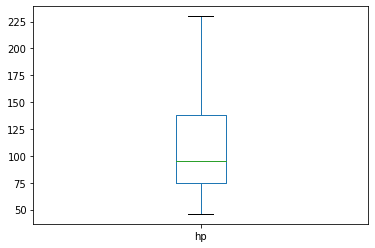

In [40]:
df.hp.plot.box()

Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”?

In [49]:
#aplicando a normalização dos dados para numeros de -1 até 1
print('Antes:\t',df.hp.max())
df.hp = scaler.fit_transform(df.hp.values.reshape(-1,1))
print('Depois:\t',df.hp.max())

Antes:	 3.05870398977614
Depois:	 3.05870398977614


Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?

In [51]:
pca.fit(df[df.columns[:-1]])
pca.explained_variance_
pca.components_

array([[-7.54290397e-03,  1.81683306e-03,  1.18045838e-01,
         1.00629347e-03,  9.92975269e-01, -1.63313644e-03,
        -1.19153729e-03],
       [-1.96355544e-02,  1.35560601e-02,  9.91942502e-01,
         7.19468026e-03, -1.18182122e-01, -3.15535453e-02,
        -2.15950892e-02],
       [ 8.36629255e-01, -1.31787086e-03,  3.16138097e-02,
        -1.77279432e-02,  3.40719256e-03,  8.64910315e-02,
         5.39670022e-01],
       [-5.22848327e-01,  1.29868904e-02,  2.06788708e-03,
         4.55282298e-03, -3.50915446e-03, -1.62481900e-01,
         8.36673940e-01],
       [-1.61776932e-01, -1.85589127e-03,  3.02877827e-02,
        -1.20905261e-01, -2.99365701e-03,  9.74879806e-01,
         8.88242682e-02],
       [-8.14832542e-03, -9.82250976e-01,  1.27806847e-02,
         1.85634032e-01,  7.30148101e-05,  1.82502615e-02,
         1.26573238e-02],
       [-7.03686992e-04,  1.86606838e-01, -5.55415524e-03,
         9.74953404e-01, -4.59576621e-04,  1.19987220e-01,
         1.4671748

Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que:

In [53]:
k = kmeans.fit(pca.components_[:3])
k.cluster_centers_

array([[-0.01963555,  0.01355606,  0.9919425 ,  0.00719468, -0.11818212,
        -0.03155355, -0.02159509],
       [-0.0075429 ,  0.00181683,  0.11804584,  0.00100629,  0.99297527,
        -0.00163314, -0.00119154],
       [ 0.83662926, -0.00131787,  0.03161381, -0.01772794,  0.00340719,
         0.08649103,  0.53967002]])

Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ['cylinders' ,'cubicinches'            ,'hp' ,'weightlbs','time-to-60'] como entradas e como saída a coluna de eficiência criada.

 

Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?

In [56]:
df['eficientes'] = 0
df.loc[df.mpg>25,'eficientes'] = 1
x = df[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]
x = scaler.transform(x)
y = df['eficientes']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=random_state)

In [57]:
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier(random_state=random_state)
dtc = dtc.fit(xtrain,ytrain)
predicts = dtc.predict(xtest)
accuracy_score(ytest,predicts)

0.8734177215189873

Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:

In [59]:
from sklearn.metrics import confusion_matrix
verdadeiro_negativo, falso_positivo, falso_negativo, verdadeiro_positivo = confusion_matrix(ytest,predicts).ravel()
print('verdadeiro_negativo:\t',verdadeiro_negativo)
print('falso_positivo:\t\t',falso_positivo)
print('falso_negativo:\t\t',falso_negativo)
print('verdadeiro_positivo:\t',verdadeiro_positivo)

verdadeiro_negativo:	 33
falso_positivo:		 8
falso_negativo:		 2
verdadeiro_positivo:	 36


Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.

 

In [63]:
lr = LogisticRegression(random_state=random_state) 
lr = lr.fit(xtrain,ytrain)
predicts  = lr.predict(xtest)
accuracy_score(ytest,predicts)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8481012658227848